In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

# Importing zip file with data
def download_zip(url, extract_to='.'):
    opened_url = urlopen(url)
    zipfile = ZipFile(BytesIO(opened_url.read()))
    zipfile.extractall(path=extract_to)
    
#download_zip("https://github.com/irecsys/CARSKit/blob/master/context-aware_data_sets/Music_InCarMusic.zip?raw=true")

In [5]:
# Importing data from .xlsx file
path = 'Music_InCarMusic\Data_InCarMusic.xlsx'
file = pd.ExcelFile(path)
sheetNames = file.sheet_names
contextualRating    = pd.read_excel(path, sheet_name=sheetNames[0])
contextFactor       = pd.read_excel(path, sheet_name=sheetNames[1])
musicTrack          = pd.read_excel(path, sheet_name=sheetNames[2])
musicCategory       = pd.read_excel(path, sheet_name=sheetNames[3])

Data Exploring

In [6]:
contextualRating

,UserID,ItemID,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather
0,1001,715,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny
1,1001,267,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny
2,1001,294,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny
3,1001,259,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snowing
4,1001,674,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rainy
...,...,...,...,...,...,...,...,...,...,...,...
4007,1042,716,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4008,1042,733,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4009,1042,682,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4010,1042,691,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(contextualRating.UserID.value_counts())

42

In [8]:
contextFactor = contextFactor.set_index("id")
contextFactor = contextFactor.drop([' positiveexplanation', ' negativeexplanation', ' question'], axis=1)
contextFactor.rename(columns = {' dimension':'dimension', ' value':'value'}, inplace = True)
contextFactor

,dimension,value
id,,
1,driving style,relaxed driving
2,driving style,sport driving
3,landscape,coast line
4,landscape,country side
5,landscape,mountains/hills
6,landscape,urban
7,mood,active
8,mood,happy
9,mood,lazy


In [9]:
# jesli obecny url obrazu - imageurl=1, jesli nie to imageurl=0
musicTrack = musicTrack.drop([' album', ' description', ' mp3url'], axis=1)
musicTrack.rename(columns = {' artist':'artist', ' title':'title', ' imageurl':'imageurl', ' category_id':'categoryId'}, inplace = True)
musicTrack['imageurl'] = np.where(musicTrack['imageurl'] == 'img/music.jpg', 0, 1)
musicTrack

,id,artist,title,imageurl,categoryId
0,248,B.B.King,The Thrill is Gone,0,1
1,250,Mamie Smith,Crazy Blues,0,1
2,251,Robert Johnson,Hellhound On My Trail,0,1
3,252,T-Bone Walker,Stormy Monday,0,1
4,253,Antonio Vivaldi,Four Seasons,0,2
...,...,...,...,...,...
134,759,Fettes Brot,Jein (Radio Edit),1,8
135,761,Lady GaGa,Paparazzi,1,8
136,760,Bon Jovi,Superman Tonight - Album Version,1,10
137,762,DJ Gollum vs. Basslovers United,Narcotic,1,4


In [10]:
musicTrack['song'] = musicTrack['artist'] + musicTrack['title']
musicTrack['songs_count'] = musicTrack.groupby('song')['song'].transform('count')
musicTrack

,id,artist,title,imageurl,categoryId,song,songs_count
0,248,B.B.King,The Thrill is Gone,0,1,B.B.KingThe Thrill is Gone,1
1,250,Mamie Smith,Crazy Blues,0,1,Mamie SmithCrazy Blues,1
2,251,Robert Johnson,Hellhound On My Trail,0,1,Robert JohnsonHellhound On My Trail,1
3,252,T-Bone Walker,Stormy Monday,0,1,T-Bone WalkerStormy Monday,1
4,253,Antonio Vivaldi,Four Seasons,0,2,Antonio VivaldiFour Seasons,1
...,...,...,...,...,...,...,...
134,759,Fettes Brot,Jein (Radio Edit),1,8,Fettes BrotJein (Radio Edit),1
135,761,Lady GaGa,Paparazzi,1,8,Lady GaGaPaparazzi,2
136,760,Bon Jovi,Superman Tonight - Album Version,1,10,Bon JoviSuperman Tonight - Album Version,1
137,762,DJ Gollum vs. Basslovers United,Narcotic,1,4,DJ Gollum vs. Basslovers UnitedNarcotic,1


In [11]:
# pozostawiam oba przypadki, poniewaz daje to wieksza szanse na trafienie na utwor lady gagi (lacznie 4 utwory), imageurl rowniez nie koryguje, poniewaz raz wyswietla sie z obrazem, raz bez.
musicTrack.loc[musicTrack['songs_count']>1]

,id,artist,title,imageurl,categoryId,song,songs_count
36,285,Lady GaGa,Paparazzi,0,8,Lady GaGaPaparazzi,2
135,761,Lady GaGa,Paparazzi,1,8,Lady GaGaPaparazzi,2


In [12]:
musicTrack = musicTrack.drop(['song', 'songs_count'], axis=1)

In [13]:
musicTrack['artist_songs'] = musicTrack.groupby('artist')['artist'].transform('count')
musicTrack

,id,artist,title,imageurl,categoryId,artist_songs
0,248,B.B.King,The Thrill is Gone,0,1,1
1,250,Mamie Smith,Crazy Blues,0,1,1
2,251,Robert Johnson,Hellhound On My Trail,0,1,1
3,252,T-Bone Walker,Stormy Monday,0,1,1
4,253,Antonio Vivaldi,Four Seasons,0,2,1
...,...,...,...,...,...,...
134,759,Fettes Brot,Jein (Radio Edit),1,8,1
135,761,Lady GaGa,Paparazzi,1,8,4
136,760,Bon Jovi,Superman Tonight - Album Version,1,10,1
137,762,DJ Gollum vs. Basslovers United,Narcotic,1,4,1


In [14]:
sett = set(musicTrack['id'])
len(sett)
musicTrack
# id jest unikatowe

,id,artist,title,imageurl,categoryId,artist_songs
0,248,B.B.King,The Thrill is Gone,0,1,1
1,250,Mamie Smith,Crazy Blues,0,1,1
2,251,Robert Johnson,Hellhound On My Trail,0,1,1
3,252,T-Bone Walker,Stormy Monday,0,1,1
4,253,Antonio Vivaldi,Four Seasons,0,2,1
...,...,...,...,...,...,...
134,759,Fettes Brot,Jein (Radio Edit),1,8,1
135,761,Lady GaGa,Paparazzi,1,8,4
136,760,Bon Jovi,Superman Tonight - Album Version,1,10,1
137,762,DJ Gollum vs. Basslovers United,Narcotic,1,4,1


In [15]:
musicCategory = musicCategory.append({1:1, 'Blues music':'Blues music'}, ignore_index=True)
musicCategory.rename(columns = {1:'id', 'Blues music':'category'}, inplace = True)
musicCategory = musicCategory.sort_values('id')
musicCategory

C:\Users\Aga\AppData\Local\Temp\ipykernel_14832\2197983241.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  musicCategory = musicCategory.append({1:1, 'Blues music':'Blues music'}, ignore_index=True)


,id,category
9,1,Blues music
0,2,Classical music
1,3,Country music
2,4,Disco music
3,5,Hip Hop music
4,6,Jazz music
5,7,Metal music
6,8,Pop music
7,9,Reggae music
8,10,Rock music


In [16]:
newContextualRate = contextualRating.drop(['UserID'], axis=1)
newContextualRate

,ItemID,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather
0,715,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny
1,267,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny
2,294,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny
3,259,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,snowing
4,674,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rainy
...,...,...,...,...,...,...,...,...,...,...
4007,716,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4008,733,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4009,682,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4010,691,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
musicTrack


,id,artist,title,imageurl,categoryId,artist_songs
0,248,B.B.King,The Thrill is Gone,0,1,1
1,250,Mamie Smith,Crazy Blues,0,1,1
2,251,Robert Johnson,Hellhound On My Trail,0,1,1
3,252,T-Bone Walker,Stormy Monday,0,1,1
4,253,Antonio Vivaldi,Four Seasons,0,2,1
...,...,...,...,...,...,...
134,759,Fettes Brot,Jein (Radio Edit),1,8,1
135,761,Lady GaGa,Paparazzi,1,8,4
136,760,Bon Jovi,Superman Tonight - Album Version,1,10,1
137,762,DJ Gollum vs. Basslovers United,Narcotic,1,4,1


In [18]:
newContextualRate =  newContextualRate.merge(musicTrack, left_on="ItemID", right_on="id")
newContextualRate

,ItemID,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather,id,artist,title,imageurl,categoryId,artist_songs
0,715,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny,715,OneRepublic,Secrets,1,8,2
1,715,2,NaN,NaN,NaN,NaN,NaN,NaN,traffic jam,NaN,715,OneRepublic,Secrets,1,8,2
2,715,3,NaN,NaN,sad,NaN,NaN,NaN,NaN,NaN,715,OneRepublic,Secrets,1,8,2
3,715,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,715,OneRepublic,Secrets,1,8,2
4,715,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rainy,715,OneRepublic,Secrets,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,688,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,688,Black Eyed Peas,I Gotta Feeling - Album Version,1,8,3
4008,688,4,NaN,NaN,NaN,NaN,city,NaN,NaN,NaN,688,Black Eyed Peas,I Gotta Feeling - Album Version,1,8,3
4009,688,2,NaN,country side,NaN,NaN,NaN,NaN,NaN,NaN,688,Black Eyed Peas,I Gotta Feeling - Album Version,1,8,3
4010,688,3,sport driving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,688,Black Eyed Peas,I Gotta Feeling - Album Version,1,8,3


In [19]:
newContextualRate = newContextualRate.drop(['artist', 'title', 'artist_songs', 'id'], axis=1)
newContextualRate

,ItemID,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather,imageurl,categoryId
0,715,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny,1,8
1,715,2,NaN,NaN,NaN,NaN,NaN,NaN,traffic jam,NaN,1,8
2,715,3,NaN,NaN,sad,NaN,NaN,NaN,NaN,NaN,1,8
3,715,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8
4,715,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rainy,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4007,688,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8
4008,688,4,NaN,NaN,NaN,NaN,city,NaN,NaN,NaN,1,8
4009,688,2,NaN,country side,NaN,NaN,NaN,NaN,NaN,NaN,1,8
4010,688,3,sport driving,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8


In [20]:
musicCategory

,id,category
9,1,Blues music
0,2,Classical music
1,3,Country music
2,4,Disco music
3,5,Hip Hop music
4,6,Jazz music
5,7,Metal music
6,8,Pop music
7,9,Reggae music
8,10,Rock music


In [21]:
newContextualRate =  newContextualRate.merge(musicCategory, left_on="categoryId", right_on="id")
newContextualRate

,ItemID,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather,imageurl,categoryId,id,category
0,715,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny,1,8,8,Pop music
1,715,2,NaN,NaN,NaN,NaN,NaN,NaN,traffic jam,NaN,1,8,8,Pop music
2,715,3,NaN,NaN,sad,NaN,NaN,NaN,NaN,NaN,1,8,8,Pop music
3,715,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,8,8,Pop music
4,715,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rainy,1,8,8,Pop music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,290,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,9,9,Reggae music
4008,290,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cloudy,0,9,9,Reggae music
4009,290,2,NaN,NaN,NaN,NaN,NaN,NaN,lots of cars,NaN,0,9,9,Reggae music
4010,290,5,NaN,coast line,NaN,NaN,NaN,NaN,NaN,NaN,0,9,9,Reggae music


In [22]:
newContextualRate = newContextualRate.drop(['ItemID', 'categoryId', 'id'], axis = 1)
newContextualRate

,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather,imageurl,category
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny,1,Pop music
1,2,NaN,NaN,NaN,NaN,NaN,NaN,traffic jam,NaN,1,Pop music
2,3,NaN,NaN,sad,NaN,NaN,NaN,NaN,NaN,1,Pop music
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Pop music
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rainy,1,Pop music
...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Reggae music
4008,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cloudy,0,Reggae music
4009,2,NaN,NaN,NaN,NaN,NaN,NaN,lots of cars,NaN,0,Reggae music
4010,5,NaN,coast line,NaN,NaN,NaN,NaN,NaN,NaN,0,Reggae music


In [23]:
newContextualRate.rename(columns = {' Rating':'Rating'}, inplace = True)

In [50]:
newCat = pd.get_dummies(newContextualRate, columns=['category'])
newCat

,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunny,1,0,0,0,0,0,0,0,1,0,0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,traffic jam,NaN,1,0,0,0,0,0,0,0,1,0,0
2,3,NaN,NaN,sad,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rainy,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cloudy,0,0,0,0,0,0,0,0,0,1,0
4009,2,NaN,NaN,NaN,NaN,NaN,NaN,lots of cars,NaN,0,0,0,0,0,0,0,0,0,1,0
4010,5,NaN,coast line,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,1,0


In [53]:
list_cols = [i for i in range(9, 20)]
drivingStyle = newCat.iloc[:, [0, 1]+list_cols]
drivingStyle

,Rating,DrivingStyle,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,NaN,1,0,0,0,0,0,0,0,1,0,0
1,2,NaN,1,0,0,0,0,0,0,0,1,0,0
2,3,NaN,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,NaN,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,NaN,0,0,0,0,0,0,0,0,0,1,0
4009,2,NaN,0,0,0,0,0,0,0,0,0,1,0
4010,5,NaN,0,0,0,0,0,0,0,0,0,1,0


In [54]:
landscape = newCat.iloc[:,[0, 2]+list_cols]
landscape

,Rating,landscape,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,NaN,1,0,0,0,0,0,0,0,1,0,0
1,2,NaN,1,0,0,0,0,0,0,0,1,0,0
2,3,NaN,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,NaN,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,NaN,0,0,0,0,0,0,0,0,0,1,0
4009,2,NaN,0,0,0,0,0,0,0,0,0,1,0
4010,5,coast line,0,0,0,0,0,0,0,0,0,1,0


In [55]:
mood = newCat.iloc[:, [0, 3]+list_cols]
mood

,Rating,mood,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,NaN,1,0,0,0,0,0,0,0,1,0,0
1,2,NaN,1,0,0,0,0,0,0,0,1,0,0
2,3,sad,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,NaN,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,NaN,0,0,0,0,0,0,0,0,0,1,0
4009,2,NaN,0,0,0,0,0,0,0,0,0,1,0
4010,5,NaN,0,0,0,0,0,0,0,0,0,1,0


In [56]:
natural = newCat.iloc[:, [0, 4]+list_cols]
natural

,Rating,naturalphenomena,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,NaN,1,0,0,0,0,0,0,0,1,0,0
1,2,NaN,1,0,0,0,0,0,0,0,1,0,0
2,3,NaN,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,NaN,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,NaN,0,0,0,0,0,0,0,0,0,1,0
4009,2,NaN,0,0,0,0,0,0,0,0,0,1,0
4010,5,NaN,0,0,0,0,0,0,0,0,0,1,0


In [57]:
road = newCat.iloc[:, [0, 5]+list_cols]
road

,Rating,RoadType,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,NaN,1,0,0,0,0,0,0,0,1,0,0
1,2,NaN,1,0,0,0,0,0,0,0,1,0,0
2,3,NaN,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,NaN,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,NaN,0,0,0,0,0,0,0,0,0,1,0
4009,2,NaN,0,0,0,0,0,0,0,0,0,1,0
4010,5,NaN,0,0,0,0,0,0,0,0,0,1,0


In [58]:
sleep = newCat.iloc[:, [0, 6]+list_cols]
sleep

,Rating,sleepiness,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,NaN,1,0,0,0,0,0,0,0,1,0,0
1,2,NaN,1,0,0,0,0,0,0,0,1,0,0
2,3,NaN,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,NaN,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,NaN,0,0,0,0,0,0,0,0,0,1,0
4009,2,NaN,0,0,0,0,0,0,0,0,0,1,0
4010,5,NaN,0,0,0,0,0,0,0,0,0,1,0


In [59]:
traffic = newCat.iloc[:, [0, 7]+list_cols]
traffic

,Rating,trafficConditions,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,NaN,1,0,0,0,0,0,0,0,1,0,0
1,2,traffic jam,1,0,0,0,0,0,0,0,1,0,0
2,3,NaN,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,NaN,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,NaN,0,0,0,0,0,0,0,0,0,1,0
4009,2,lots of cars,0,0,0,0,0,0,0,0,0,1,0
4010,5,NaN,0,0,0,0,0,0,0,0,0,1,0


In [60]:
weather = newCat.iloc[:, [0, 8]+list_cols]
weather

,Rating,weather,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,sunny,1,0,0,0,0,0,0,0,1,0,0
1,2,NaN,1,0,0,0,0,0,0,0,1,0,0
2,3,NaN,1,0,0,0,0,0,0,0,1,0,0
3,1,NaN,1,0,0,0,0,0,0,0,1,0,0
4,5,rainy,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,NaN,0,0,0,0,0,0,0,0,0,1,0
4008,4,cloudy,0,0,0,0,0,0,0,0,0,1,0
4009,2,NaN,0,0,0,0,0,0,0,0,0,1,0
4010,5,NaN,0,0,0,0,0,0,0,0,0,1,0


In [61]:
list_df = [drivingStyle, landscape, mood, natural, road, sleep, traffic, weather]
for i in range(8):
    list_df[i] = list_df[i].dropna()

In [62]:
list_df[0]

,Rating,DrivingStyle,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
26,2,sport driving,1,0,0,0,0,0,0,0,1,0,0
34,2,relaxed driving,0,0,0,0,0,0,0,0,1,0,0
38,1,sport driving,0,0,0,0,0,0,0,0,1,0,0
46,5,relaxed driving,0,0,0,0,0,0,0,0,1,0,0
58,0,relaxed driving,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1,sport driving,0,0,0,0,0,0,0,0,0,1,0
3982,3,sport driving,0,0,0,0,0,0,0,0,0,1,0
3986,5,sport driving,0,0,0,0,0,0,0,0,0,1,0
4005,1,sport driving,0,0,0,0,0,0,0,0,0,1,0


In [63]:
drivingStyle = pd.get_dummies(list_df[0], columns=['DrivingStyle'])
drivingStyle

,Rating,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music,DrivingStyle_relaxed driving,DrivingStyle_sport driving
26,2,1,0,0,0,0,0,0,0,1,0,0,0,1
34,2,0,0,0,0,0,0,0,0,1,0,0,1,0
38,1,0,0,0,0,0,0,0,0,1,0,0,0,1
46,5,0,0,0,0,0,0,0,0,1,0,0,1,0
58,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3982,3,0,0,0,0,0,0,0,0,0,1,0,0,1
3986,5,0,0,0,0,0,0,0,0,0,1,0,0,1
4005,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [64]:
landscape = pd.get_dummies(list_df[1], columns=['landscape'])
landscape

,Rating,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music,landscape_coast line,landscape_country side,landscape_mountains,landscape_urban
6,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
18,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
41,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
42,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
45,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,5,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3974,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3981,4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4004,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [65]:
mood = pd.get_dummies(list_df[2], columns=['mood'])
mood

,Rating,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music,mood_active,mood_happy,mood_lazy,mood_sad
2,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
10,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
17,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
20,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
21,4,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3956,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3977,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3980,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3990,5,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [66]:
list_df[3].rename(columns={'naturalphenomena ':'naturalphenomena'}, inplace=True)

C:\Users\Aga\AppData\Local\Temp\ipykernel_14832\3641852576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_df[3].rename(columns={'naturalphenomena ':'naturalphenomena'}, inplace=True)


In [67]:
natural = pd.get_dummies(list_df[3], columns=['naturalphenomena'])
natural

,Rating,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music,naturalphenomena_afternoon,naturalphenomena_day time,naturalphenomena_morning,naturalphenomena_night
9,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
24,5,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
25,3,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
29,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
30,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3985,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3993,4,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3998,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [68]:
road = pd.get_dummies(list_df[4], columns=['RoadType'])
road

,Rating,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music,RoadType_city,RoadType_highway,RoadType_serpentine
13,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
14,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0
49,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
56,3,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3942,3,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3953,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3964,3,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3984,5,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [69]:
sleep = pd.get_dummies(list_df[5], columns=['sleepiness'])
sleep

,Rating,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music,sleepiness_awake,sleepiness_sleepy
8,1,1,0,0,0,0,0,0,0,1,0,0,0,1
16,1,1,0,0,0,0,0,0,0,1,0,0,1,0
68,2,1,0,0,0,0,0,0,0,1,0,0,0,1
92,2,1,0,0,0,0,0,0,0,1,0,0,0,1
108,4,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3868,4,0,0,1,0,0,0,0,0,0,0,0,1,0
3881,5,0,0,1,0,0,0,0,0,0,0,0,0,1
3897,4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [70]:
traffic = pd.get_dummies(list_df[6], columns=['trafficConditions'])
traffic

,Rating,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music,trafficConditions_free road,trafficConditions_lots of cars,trafficConditions_traffic jam
1,2,1,0,0,0,0,0,0,0,1,0,0,0,0,1
12,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
28,4,0,0,0,0,0,0,0,0,1,0,0,0,1,0
36,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
40,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3932,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3941,3,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3961,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4001,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [71]:
weather = pd.get_dummies(list_df[7], columns=['weather'])
weather

,Rating,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music,weather_cloudy,weather_rainy,weather_snowing,weather_sunny
0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,3,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
32,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
48,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3988,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3989,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3996,5,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [73]:
rating_weather = weather[['Rating']]
weather = weather.drop(columns=['Rating'], axis=1)

In [100]:
newCat = newCat.fillna(0)
newCat

,Rating,DrivingStyle,landscape,mood,naturalphenomena,RoadType,sleepiness,trafficConditions,weather,imageurl,category_Blues music,category_Classical music,category_Country music,category_Disco music,category_Hip Hop music,category_Jazz music,category_Metal music,category_Pop music,category_Reggae music,category_Rock music
0,2,0,0,0,0,0,0,0,sunny,1,0,0,0,0,0,0,0,1,0,0
1,2,0,0,0,0,0,0,traffic jam,0,1,0,0,0,0,0,0,0,1,0,0
2,3,0,0,sad,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,5,0,0,0,0,0,0,0,rainy,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4007,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4008,4,0,0,0,0,0,0,0,cloudy,0,0,0,0,0,0,0,0,0,1,0
4009,2,0,0,0,0,0,0,lots of cars,0,0,0,0,0,0,0,0,0,0,1,0
4010,5,0,coast line,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [110]:
newCat = pd.get_dummies(newCat, columns=['RoadType', 'DrivingStyle', 'landscape', 'mood', 'naturalphenomena ', 'sleepiness', 'trafficConditions', 'weather'])

In [111]:
y = newCat[['Rating']]
X = newCat.drop(columns=['Rating'], axis=1)

In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split

X_train_weather, X_test_weather, y_train_weather, y_test_weather = train_test_split(X, y, test_size = 0.25, random_state=42)

In [120]:
model_weather = RandomForestRegressor()

In [116]:
clf = svm.SVC(kernel='linear')

In [117]:
clf.fit(X_train_weather, y_train_weather)

C:\Users\Aga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [118]:
y_pred = clf.predict(X_test_weather)

In [119]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test_weather, y_pred))

Accuracy: 0.382851445663011


C:\Users\Aga\AppData\Local\Temp\ipykernel_14832\4230581723.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_weather.fit(X_train_weather, y_train_weather)
C:\Users\Aga\AppData\Local\Temp\ipykernel_14832\4230581723.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_weather.fit(X_train_weather, y_train_weather)
C:\Users\Aga\AppData\Local\Temp\ipykernel_14832\4230581723.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_weather.fit(X_train_weather, y_train_weather)
C:\Users\Aga\AppData\Local\Temp\ipykernel_14832\4230581723.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

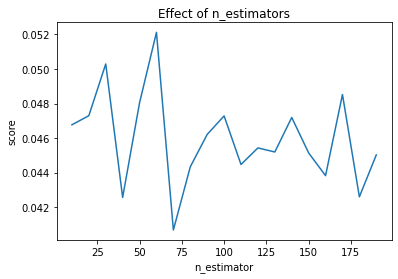

In [121]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model_weather.set_params(n_estimators=n)
    model_weather.fit(X_train_weather, y_train_weather)
    scores.append(model_weather.score(X_test_weather, y_test_weather))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [122]:
model_weather.set_params(n_estimators=50)
model_weather.fit(X_train_weather, y_train_weather)
print(model_weather.score(X_test_weather, y_test_weather))

C:\Users\Aga\AppData\Local\Temp\ipykernel_14832\70045715.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_weather.fit(X_train_weather, y_train_weather)


0.044163602763715115


In [123]:
from sklearn.metrics import mean_squared_error
prediction = model_weather.predict(X_test_weather)
mse = mean_squared_error(y_test_weather, prediction)
mse

2.0371389761149263